In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA


In [ ]:
# df = pd.read_csv("/content/ecommerce_sales_data.csv")
df = pd.read_csv("ecommerce_sales_data.csv")
df.head()

# Load data
# Check data types
# Missing values
# Duplicate rows
# Outliers
# Visualization

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


In [ ]:
df.isnull().sum()           # no missing value

,0
Order Date,0
Product Name,0
Category,0
Region,0
Quantity,0
Sales,0
Profit,0


In [ ]:
df.duplicated()
df.duplicated().sum()

# df.drop_duplicates()

np.int64(0)

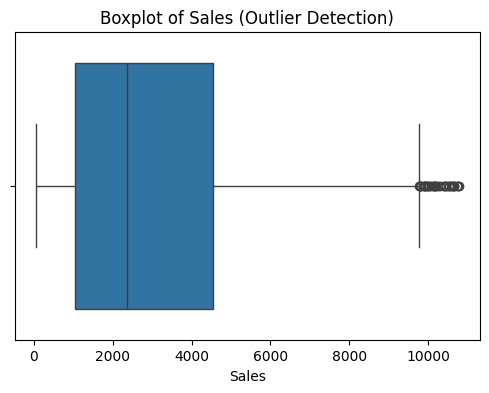

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Sales"])
plt.title("Boxplot of Sales (Outlier Detection)")
plt.show()


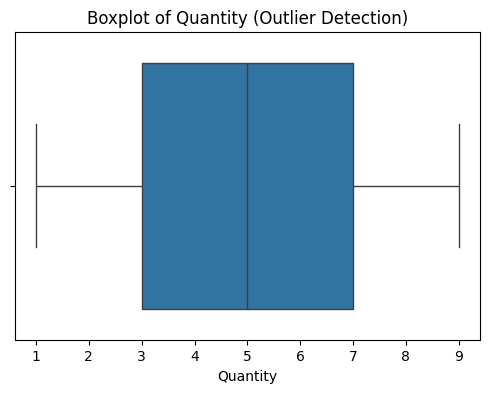

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Quantity"])
plt.title("Boxplot of Quantity (Outlier Detection)")
plt.show()


In [ ]:
Q1 = df["Sales"].quantile(0.25)          # for remove outliers
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["Sales"] >= Q1 - 1.5 * IQR) &
        (df["Sales"] <= Q3 + 1.5 * IQR)]


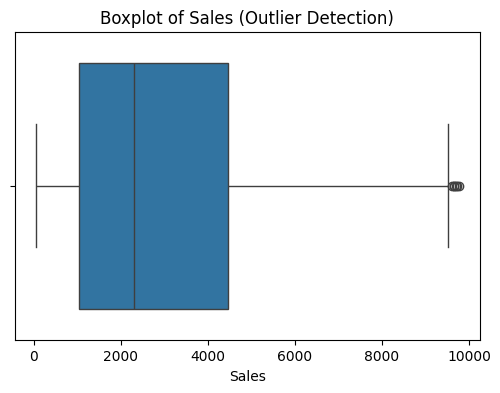

In [ ]:
plt.figure(figsize=(6,4))                        # boxplot after removing outliers
sns.boxplot(x=df["Sales"])
plt.title("Boxplot of Sales (Outlier Detection)")
plt.show()

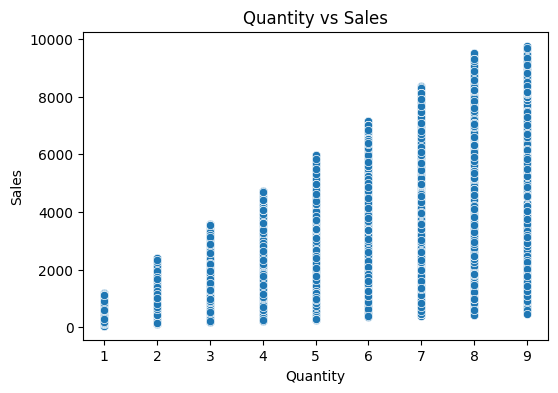

In [ ]:
plt.figure(figsize=(6,4))           # visualizations
sns.scatterplot(x=df["Quantity"], y=df["Sales"])
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.title("Quantity vs Sales")
plt.show()


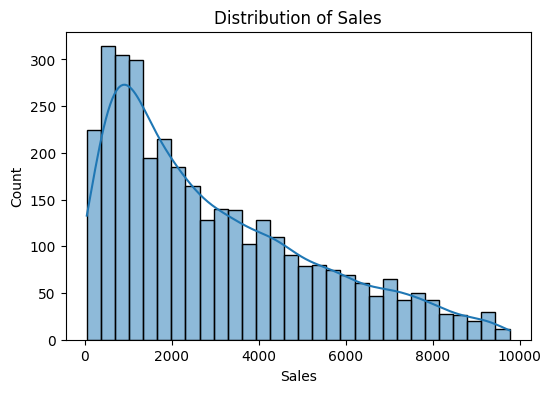

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Sales"], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.show()


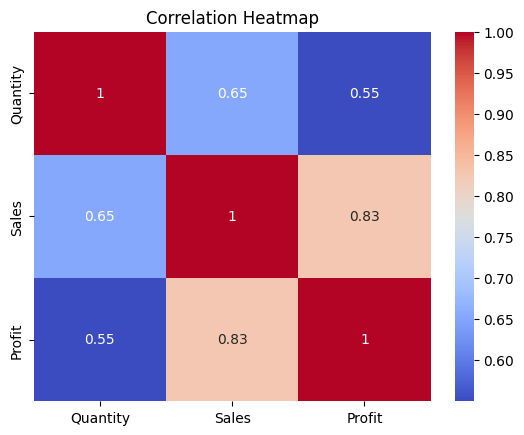

In [ ]:
# plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include="number").corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#***Simple Linear Regression*** **model training & analysis**


In [ ]:
X = df[["Quantity"]]   # Independent variable
y = df["Sales"]        # Target


In [ ]:
import numpy as np

class MeraSimpleLinearRegressionOLS:
    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, X, y):        # fit function take 2 arguments
        # Ensure X and y are numpy arrays
        X = np.array(X).flatten()
        y = np.array(y)

        # Calculate means
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        # Formula
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)

        self.slope = numerator / denominator
        self.intercept = y_mean - (self.slope * x_mean)

        print(f"Model Trained.\nSlope: {self.slope:.4f}\nIntercept: {self.intercept:.4f}")

    def predict(self, X):
        X = np.array(X).flatten()
        return (self.slope * X) + self.intercept



In [ ]:
# Our custom model using formula
custom_model = MeraSimpleLinearRegressionOLS()
custom_model.fit(X, y)

# Show sample predictions
predictions = custom_model.predict(X.head())
print("\nSample Predictions for first 5 rows:")
print(predictions)

Model Trained.
Slope: 598.0875
Intercept: 50.2932

Sample Predictions for first 5 rows:
[2442.64303477 4236.90539821 3040.73048925 1246.46812581  648.38067133]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
print("Intercept:", model.intercept_)
print("Slope (Coefficient):", model.coef_[0])


Intercept: 57.392111992488935
Slope (Coefficient): 594.2374724588537


In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[3622.81694675 4217.0544192  3622.81694675 1840.10452937 4217.0544192
  651.62958445  651.62958445  651.62958445 4217.0544192  1840.10452937
 1245.86705691 1245.86705691 3028.57947429 3622.81694675  651.62958445
 4217.0544192  2434.34200183 2434.34200183  651.62958445 1840.10452937
 3622.81694675 1840.10452937 2434.34200183 4811.29189166 1840.10452937
 5405.52936412 3028.57947429 5405.52936412 4217.0544192  4217.0544192
 1245.86705691  651.62958445 1245.86705691 2434.34200183 2434.34200183
 4217.0544192  5405.52936412 5405.52936412 4811.29189166 1840.10452937
 4811.29189166 4217.0544192  5405.52936412 2434.34200183  651.62958445
 4811.29189166 3028.57947429 4811.29189166 3622.81694675 3028.57947429
 5405.52936412 3028.57947429 4811.29189166 3622.81694675 2434.34200183
 3028.57947429 3622.81694675 3028.57947429 3622.81694675 4811.29189166
 5405.52936412 5405.52936412 2434.34200183 5405.52936412 3622.81694675
  651.62958445 4811.29189166  651.62958445 3622.81694675 5405.52936412
 1245.86

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 3212598.770346686
RMSE: 1792.3723860701173
R² Score: 0.43354448116421795


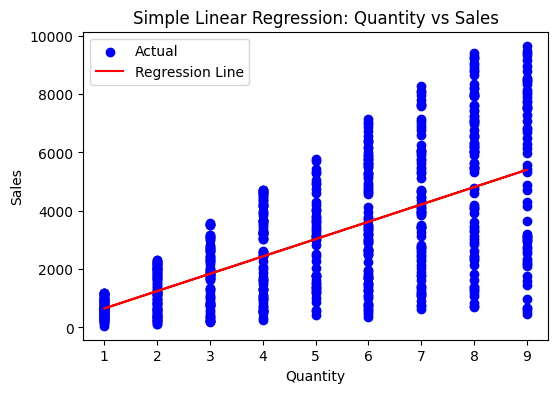

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.legend()
plt.title("Simple Linear Regression: Quantity vs Sales")
plt.show()


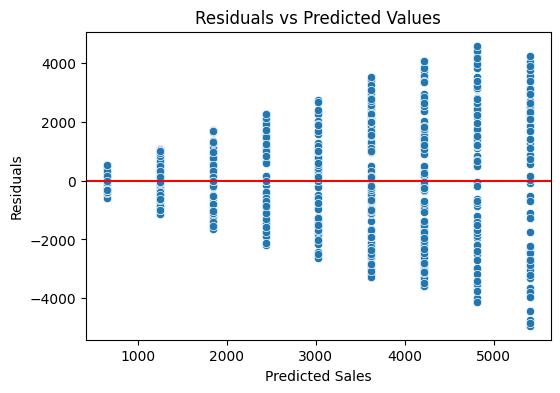

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


# Aryan Yadav Scaling and Polynomial regression

In [ ]:
df.columns

Index(['Order Date', 'Product Name', 'Category', 'Region', 'Quantity', 'Sales',
       'Profit'],
      dtype='object')

In [ ]:
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3465 entries, 0 to 3498
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3465 non-null   object 
 1   Product Name  3465 non-null   object 
 2   Category      3465 non-null   object 
 3   Region        3465 non-null   object 
 4   Quantity      3465 non-null   int64  
 5   Sales         3465 non-null   int64  
 6   Profit        3465 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 216.6+ KB


In [ ]:
df.describe()

,Quantity,Sales,Profit
count,3465.000000,3465.000000,3465.000000
mean,4.890620,2975.311977,513.950072
std,2.556043,2342.170363,484.728492
min,1.000000,51.000000,6.970000
25%,3.000000,1038.000000,157.470000
50%,5.000000,2314.000000,358.020000
75%,7.000000,4452.000000,716.910000
max,9.000000,9765.000000,2794.890000


In [ ]:
# taking only continuous value
X= df[['Quantity','Sales']]


In [ ]:
# now i my target variable
y = df['Profit']

In [ ]:
X.shape

(3465, 2)

In [ ]:
X.columns

Index(['Quantity', 'Sales'], dtype='object')

In [ ]:
y.shape

(3465,)

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
X_train.shape,X_test.shape

((2772, 2), (2772,))

In [ ]:
y_train.shape,y_test.shape

((693, 2), (693,))

In [ ]:
X_train.head()

,Quantity,Sales
1456,5,475
506,3,1476
1240,7,3675
1061,7,5131
1319,8,1800


In [ ]:
X_test.head()

1456     76.22
506      85.16
1240    227.14
1061    368.11
1319    326.03
Name: Profit, dtype: float64

# importing dependencies

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#  i am converting form pandas to numpy
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values


In [ ]:
#polynomial feature of degree 2

def make_polynomial_features(X):
    x1 = X[:, 0:1]
    x2 = X[:, 1:2]
    X_poly = np.hstack([
        x1,
        x2,
        x1**2,
        x2**2,
        x1 * x2
    ])
    return X_poly

X_train_poly = make_polynomial_features(X_train_np)
X_test_poly = make_polynomial_features(X_test_np)


# feature scalling and normalization

In [ ]:
mean = X_train_poly.mean(axis=0)
std = X_train_poly.std(axis=0)
std[std == 0] = 1

X_train_poly = (X_train_poly - mean) / std
X_test_poly = (X_test_poly - mean) / std


In [ ]:
# converting my value from numpy to tensor
X_train_t = torch.tensor(X_train_poly, dtype=torch.float32)
X_test_t = torch.tensor(X_test_poly, dtype=torch.float32)

y_train_t = torch.tensor(y_train_np, dtype=torch.float32).view(-1, 1)
y_test_t = torch.tensor(y_test_np, dtype=torch.float32).view(-1, 1)


# Creating model

In [ ]:
# Crating model while using pytorch
class PolynomialRegressionScratch(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.W = nn.Parameter(torch.randn(input_size, 1) * 0.01)
        self.b = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return x.mm(self.W) + self.b

model = PolynomialRegressionScratch(input_size=5)


In [ ]:
# making loss and manua loop
criterion = nn.MSELoss()

lr = 0.05     # higher learning rate because data is normalized
epochs = 80   # less than 100 epochs

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train_t)

    # Compute loss
    loss = criterion(y_pred, y_train_t)

    # Zero gradients
    model.zero_grad()

    # Backward pass
    loss.backward()

    # Manual gradient descent update
    with torch.no_grad():
        model.W -= lr * model.W.grad
        model.b -= lr * model.b.grad

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

print("Training finished!")


Epoch 0, Loss: 493265.96875
Epoch 10, Loss: 110733.8515625
Epoch 20, Loss: 79652.296875
Epoch 30, Loss: 75361.5078125
Epoch 40, Loss: 74523.125
Epoch 50, Loss: 74165.4609375
Epoch 60, Loss: 73898.0703125
Epoch 70, Loss: 73665.6484375
Training finished!


# evaluation of test data

In [ ]:
model.eval()
with torch.no_grad():
    y_test_pred_t = model(X_test_t)

y_test_pred = y_test_pred_t.numpy().ravel()
y_test_true = y_test_np

mse = mean_squared_error(y_test_true, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_true, y_test_pred)

print("Evaluation Metrics:")
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)


# plotting

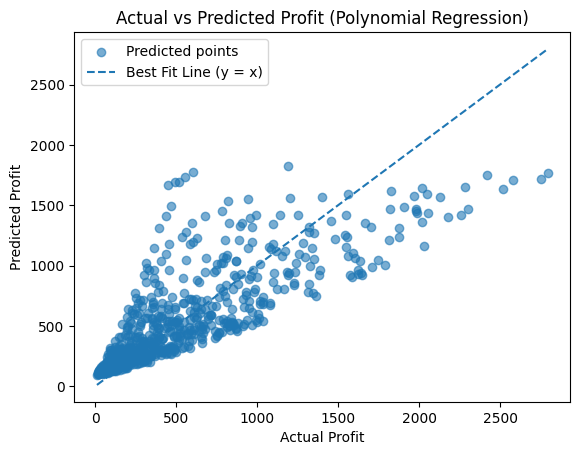

In [ ]:
plt.figure()

plt.scatter(y_test_true, y_test_pred, alpha=0.6, label="Predicted points")

# Best fit reference line y = x
min_val = min(y_test_true.min(), y_test_pred.min())
max_val = max(y_test_true.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", label="Best Fit Line (y = x)")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (Polynomial Regression)")
plt.legend()
plt.show()
